<a href="https://colab.research.google.com/github/znehraks/ML_study/blob/main/_9_%EC%95%99%EC%83%81%EB%B8%94(Ensemble)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [157]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [158]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [159]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [160]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [161]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [162]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015332698822021484 (+/- 0.0006196702610349014)
avg score time: 0.00260162353515625 (+/- 0.0011348670270133721)
avg test score: 0.96 (+/- 0.024944382578492935)


In [163]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017985773086547852 (+/- 0.001168735962088411)
avg score time: 0.006598758697509766 (+/- 0.0001994844361756569)
avg test score: 0.9466666666666665 (+/- 0.03399346342395189)


##### 와인 데이터

In [164]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [165]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017858505249023437 (+/- 0.0005483406020965051)
avg score time: 0.0035258769989013673 (+/- 0.0005910999775890189)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [166]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01968097686767578 (+/- 0.005302052722488463)
avg score time: 0.007158517837524414 (+/- 0.0006909258205115945)
avg test score: 0.9442857142857143 (+/- 0.03917259648586876)


##### 유방암 데이터

In [167]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [168]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002043342590332031 (+/- 0.0004053447541520589)
avg score time: 0.006663656234741211 (+/- 0.0013647523025752547)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [169]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020942020416259765 (+/- 0.003030543754233459)
avg score time: 0.01263256072998047 (+/- 0.0006509145861640096)
avg test score: 0.9613569321533924 (+/- 0.02117153105068828)


#### SVC

##### 붓꽃 데이터

In [170]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [171]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002077007293701172 (+/- 0.0007860107781363481)
avg score time: 0.0006440162658691406 (+/- 0.00017972304350833643)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [172]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02515854835510254 (+/- 0.0019848745937742786)
avg score time: 0.002970314025878906 (+/- 0.00016092661387514086)
avg test score: 0.9400000000000001 (+/- 0.024944382578492935)


##### 와인 데이터

In [173]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [174]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003093051910400391 (+/- 0.000970250087910762)
avg score time: 0.0009562015533447265 (+/- 0.0002573484709152414)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [175]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02580099105834961 (+/- 0.005450306531644557)
avg score time: 0.002931833267211914 (+/- 0.00011712231101899648)
avg test score: 0.9609523809523809 (+/- 0.02214499050996228)


##### 유방암 데이터

In [176]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [177]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004622840881347656 (+/- 0.0012076254921384976)
avg score time: 0.0009656906127929688 (+/- 9.461290375938608e-05)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [178]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03238215446472168 (+/- 0.0021368512971523695)
avg score time: 0.005894088745117187 (+/- 0.0001231590719596962)
avg test score: 0.9683434249340165 (+/- 0.01320194969761479)


#### Decision Tree

##### 붓꽃 데이터

In [179]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [180]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015330314636230469 (+/- 0.00047270924057712395)
avg score time: 0.0004874229431152344 (+/- 4.999623391854785e-05)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [181]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022002696990966797 (+/- 0.002080252433648906)
avg score time: 0.002099466323852539 (+/- 6.170748172002549e-05)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [182]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [183]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001231813430786133 (+/- 4.127950388421833e-05)
avg score time: 0.00030612945556640625 (+/- 2.5384133998200044e-05)
avg test score: 0.8763492063492062 (+/- 0.05201507621052956)


In [184]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023301172256469726 (+/- 0.00195159135593058)
avg score time: 0.002304363250732422 (+/- 0.0004199667954832041)
avg test score: 0.9663492063492063 (+/- 0.027154457745641215)


##### 유방암 데이터

In [185]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [186]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.007364082336425781 (+/- 0.0007360343581285853)
avg score time: 0.0005283355712890625 (+/- 0.00014030255785050814)
avg test score: 0.9173420276354604 (+/- 0.018416418267181652)


In [187]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03204135894775391 (+/- 0.00145886368589519)
avg score time: 0.002323293685913086 (+/- 4.781837522872761e-05)
avg test score: 0.9613724576929048 (+/- 0.015251707166062459)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [188]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [189]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [190]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0013715744018554688 (+/- 0.000620251978053477)
avg score time: 0.0015572071075439452 (+/- 0.0004988273166516079)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [191]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017603111267089844 (+/- 0.004071990381803718)
avg score time: 0.007926559448242188 (+/- 0.0005015601080248536)
avg test score: 0.41018954479164965 (+/- 0.15143782622080237)


##### 당뇨병 데이터

In [192]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [193]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015309810638427734 (+/- 0.00022995822843501694)
avg score time: 0.0024010181427001954 (+/- 0.0005192825528853658)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [194]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015883350372314455 (+/- 0.003007162571273618)
avg score time: 0.007152175903320313 (+/- 0.0005538293238141153)
avg test score: 0.4236175162662564 (+/- 0.103793317610459)


#### SVR

##### 보스턴 주택 가격 데이터

In [195]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [196]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.011744356155395508 (+/- 0.0015001957642982505)
avg score time: 0.0020534038543701173 (+/- 0.00024022224059014896)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [197]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04201526641845703 (+/- 0.0046257557575615)
avg score time: 0.007215118408203125 (+/- 0.00020140726664716164)
avg test score: 0.11856217104786185 (+/- 0.3276194187557502)


##### 당뇨병 데이터

In [198]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [199]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008517599105834961 (+/- 0.0014036827753401424)
avg score time: 0.0017138481140136718 (+/- 0.00045935262143240115)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [200]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.031407737731933595 (+/- 0.001623275500958903)
avg score time: 0.005995893478393554 (+/- 0.00048634909117754817)
avg test score: 0.08672786658695328 (+/- 0.027866505007375503)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [201]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [202]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004105377197265625 (+/- 0.000613402204577774)
avg score time: 0.0007250308990478516 (+/- 0.00010678246221969228)
avg test score: 0.0383089570507336 (+/- 0.9513108603596206)


In [203]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.031391477584838866 (+/- 0.0012516725410508102)
avg score time: 0.0026708126068115236 (+/- 0.00015506678401623644)
avg test score: 0.45620472759893627 (+/- 0.3649828895903512)


##### 당뇨병 데이터

In [204]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5,
                                  max_features=0.5)

In [205]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0037281990051269533 (+/- 0.0008665362062287305)
avg score time: 0.0009282588958740235 (+/- 0.0002925528909573965)
avg test score: -0.1494030348488712 (+/- 0.0853662987848708)


In [206]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.025990056991577148 (+/- 0.002495233662543761)
avg score time: 0.0023102760314941406 (+/- 2.2355985238673074e-05)
avg test score: 0.34081961479473416 (+/- 0.08834768832955668)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [207]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [208]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [209]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12460341453552246 (+/- 0.003200580993092618)
avg score time: 0.008566713333129883 (+/- 0.00042054611469120314)
avg test score: 0.96 (+/- 0.024944382578492935)


In [210]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12960643768310548 (+/- 0.0035740091860223962)
avg score time: 0.009293937683105468 (+/- 0.001533639370538459)
avg test score: 0.9552380952380952 (+/- 0.013219468453115573)


In [211]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.18896088600158692 (+/- 0.0054024538843523645)
avg score time: 0.009714365005493164 (+/- 0.000881820682147505)
avg test score: 0.9613414066138798 (+/- 0.023917848215843834)


### Random Forests 회귀

In [212]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [213]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2908909797668457 (+/- 0.012489751706053024)
avg score time: 0.00863056182861328 (+/- 0.00031685954381438427)
avg test score: 0.6055119128196924 (+/- 0.2286854619284527)


In [214]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2453843593597412 (+/- 0.003214803765252089)
avg score time: 0.009274816513061524 (+/- 0.0006231782722604141)
avg test score: 0.42131487775234877 (+/- 0.048540375598715484)


### Extremely Randomized Trees 분류

In [215]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [216]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08737974166870117 (+/- 0.001985024754698392)
avg score time: 0.008296585083007813 (+/- 0.00030018103865488285)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [217]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09097099304199219 (+/- 0.002101532344773906)
avg score time: 0.008767843246459961 (+/- 0.0005834163136201614)
avg test score: 0.9833333333333332 (+/- 0.013608276348795441)


In [218]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10640206336975097 (+/- 0.0035105333139483046)
avg score time: 0.010780715942382812 (+/- 0.0021519125285752155)
avg test score: 0.9736531594472908 (+/- 0.01752843724619471)


### Extremely Randomized Trees 회귀

In [219]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [220]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17005481719970703 (+/- 0.0023418467107710612)
avg score time: 0.009339284896850587 (+/- 0.0016448140496419757)
avg test score: 0.6309487818936452 (+/- 0.24510919730130812)


In [221]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.147149658203125 (+/- 0.0034200949919293857)
avg score time: 0.009643983840942384 (+/- 0.0009036870381966888)
avg test score: 0.44524409594620773 (+/- 0.030709519042213883)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [222]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [223]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [224]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

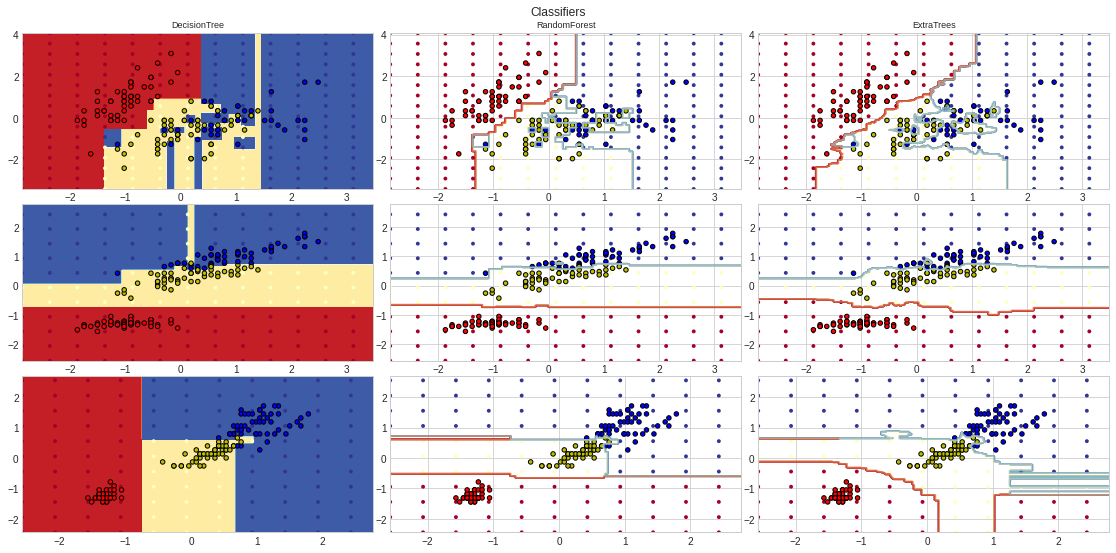

In [225]:
plt.figure(figsize=(16,8))
for pair in ([0,1],[0,2],[2,3]):
  for model in models:
    X = iris.data[:,pair]
    y = iris.target

    idx= np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    model.fit(X, y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    
    plt.subplot(3,3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0/len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contour(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
  
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:,0], X[:,1],c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k', s=20)
    plot_idx += 1

plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [226]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

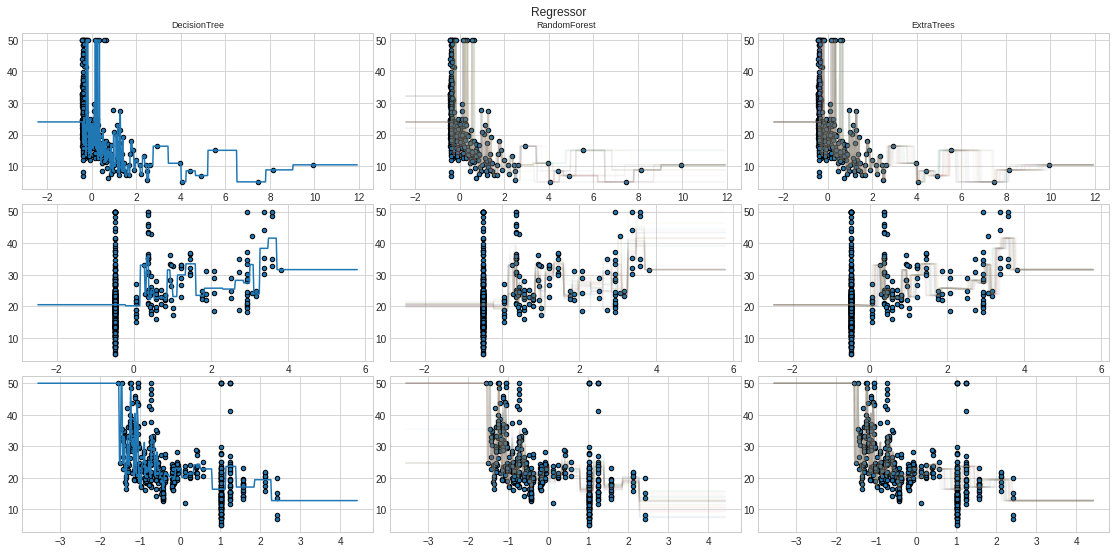

In [227]:
plt.figure(figsize=(16,8))
for pair in (0,1,2):
  for model in models:
    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X.reshape(-1,1),y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3,plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx,yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0/len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [228]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [229]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [230]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.061567068099975586 (+/- 0.0049439225018245835)
avg score time: 0.007038545608520508 (+/- 0.0012628890973498215)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [231]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06823234558105469 (+/- 0.0013535646708453483)
avg score time: 0.006584310531616211 (+/- 0.0002755972584473928)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [232]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14146194458007813 (+/- 0.004928903787401458)
avg score time: 0.0070551872253417965 (+/- 0.00016158467019484674)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [233]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [234]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08459086418151855 (+/- 0.005521164671446628)
avg score time: 0.004043674468994141 (+/- 0.00018439802784722564)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [235]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07347087860107422 (+/- 0.01340732237319651)
avg score time: 0.003678560256958008 (+/- 0.0004803461898612781)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [236]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [237]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [238]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16260004043579102 (+/- 0.009582486783044962)
avg score time: 0.0011165618896484375 (+/- 0.0001851475485603243)
avg test score: 0.96 (+/- 0.024944382578492935)


In [239]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21139278411865234 (+/- 0.009300770773555064)
avg score time: 0.0011020183563232421 (+/- 0.00011368795885527992)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [240]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.4046600341796875 (+/- 0.011582396704141039)
avg score time: 0.0009256362915039063 (+/- 2.638663627663154e-05)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [241]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [242]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11331486701965332 (+/- 0.003189900802178282)
avg score time: 0.0009752750396728515 (+/- 6.757080338079378e-05)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


In [243]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08631606101989746 (+/- 0.0022228028293706454)
avg score time: 0.0009905338287353516 (+/- 2.5337333673197503e-05)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [244]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [245]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

In [246]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [247]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2,1,2]
)

In [248]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [250]:
X = iris.data[:,[0,2]]
y = iris.target

In [251]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1,kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting='soft',
                              weights=[2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [252]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

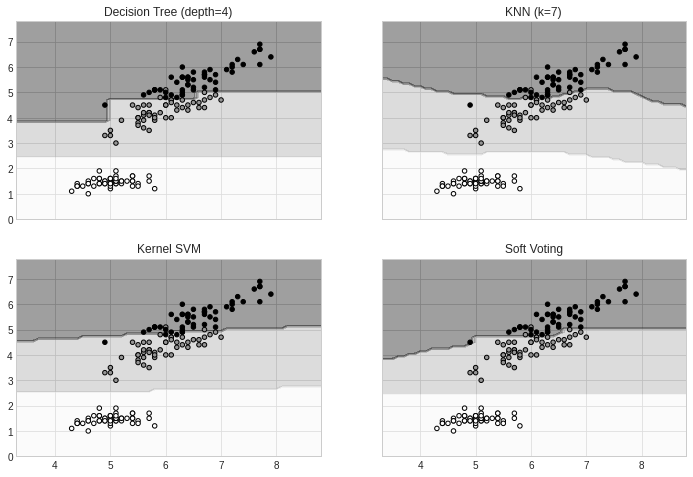

In [253]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z,alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [255]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

In [256]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [257]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [258]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [259]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

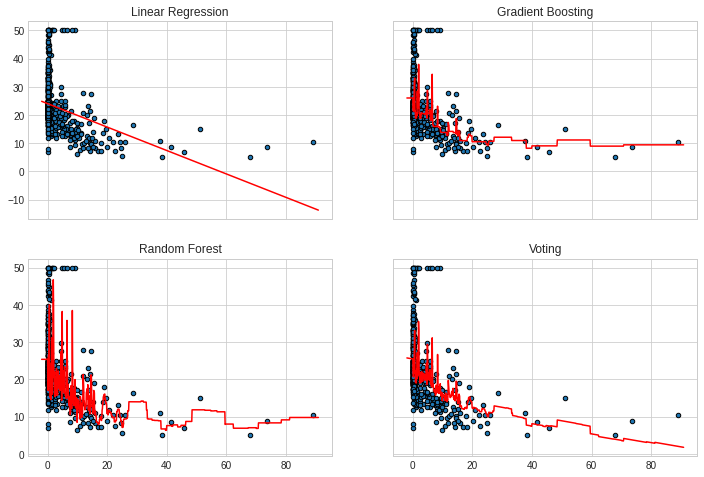

In [260]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))
  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X,y,s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [287]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [288]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr',SVR())]

In [289]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [290]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11646738052368164 (+/- 0.0031586158948843823)
avg score time: 0.0023862838745117186 (+/- 4.877403176150023e-05)
avg test score: 0.3256934201056158 (+/- 0.328900714579129)


#### 회귀식 시각화

In [291]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [292]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

In [293]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

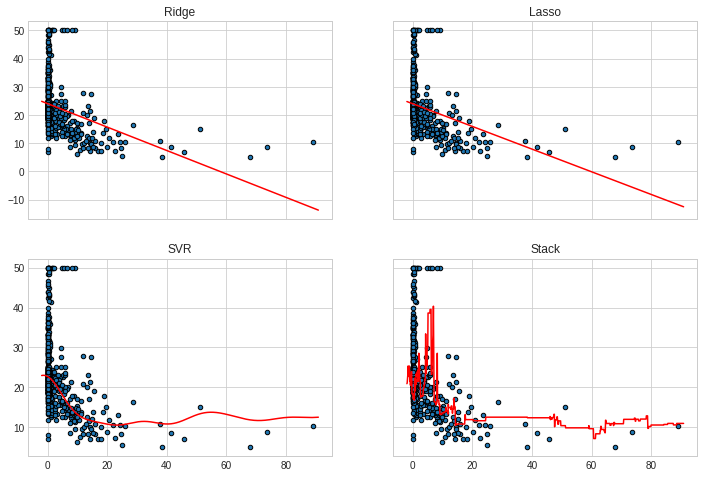

In [294]:
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, reg],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))
  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X,y,s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()

### 스택 분류

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [296]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC()),
               ('naive', GaussianNB())]

In [297]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [298]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2928453922271729 (+/- 0.0251434531349875)
avg score time: 0.008946657180786133 (+/- 0.0002720468194504638)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


#### 결정 경계 시각화

In [300]:
X = iris.data[:,[0,2]]
y = iris.target

In [301]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [302]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

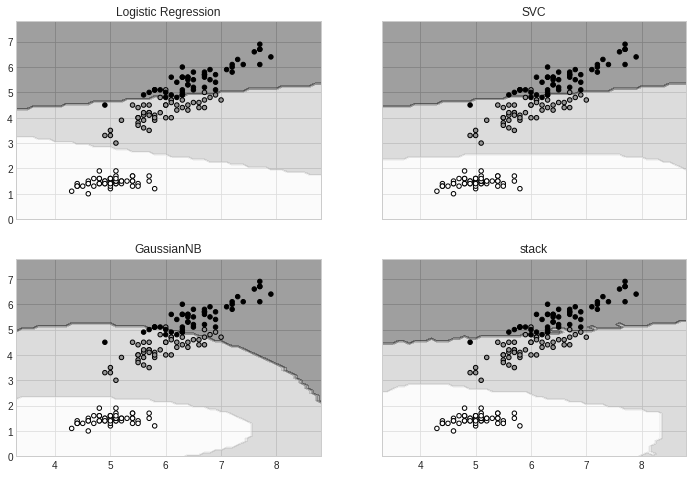

In [303]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC',
                           'GaussianNB', 'stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z,alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()